# Replicating IBM Watson Content Mining

Author: Christoph Schauer <br/>
Uploaded: 16.06.2019


## Introduction 

In this project, I'm replicating the key functionalities of [IBM's Watson Explorer Deep Analytics Edition](https://www.ibm.com/nl-en/products/watson-explorer) Content Mining (as shown [in this short video](https://www.youtube.com/watch?v=B9SMcP1w3_o)) in Python on a basic level. For the time being this is primarily a little exercise in NLP with spacy and programming.

This project uses two scripts, content_mining.py and custom_tfidf.py. content_mining.py includes most of the code, custom_tfidf includes functions that build a (basic) tf-idf matrix from a series of spacy doc objects.

The dataset used is the [Twitter US Airline Sentiment Dataset](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) from Kaggle.
Twitter data is not really ideal for this purpose, but this dataset is small, easy to handle, and comes with date fields, which is required here.

This notebook is just for showing how these functions work, almost all the code is in the scripts. The headlines in this notebook correspond to the functionalities of Watson Explorer Content Mining that I'm replicating.

## Dependencies

* numpy - 1.15.4
* pandas - 0.23.4
* spacy - 2.1.4
* matplotlib - 3.0.2
* seaborn - 0.9.0
* wordcloud - 1.5.0

## Import required packages and scripts

In [1]:
import pandas as pd

import content_mining
import custom_tfidf

## 0. Data Preparation

In [2]:
# Load data, rename columns, convert datetime column to datetime
data_df = pd.read_csv("data/airline_tweets.csv")
data_df.columns = ["id", "text", "datetime", "location"]
data_df["datetime"] = pd.to_datetime(data_df["datetime"])

# Some text preparation: Add whitespace between . and @
data_df["text"] = data_df["text"].str.replace(".@", ". @")

# Check data
data_df.head()

,id,text,datetime,location
0,570306133677760513,@VirginAmerica What. @dhepburn said.,2015-02-24 19:35:52,NaN
1,570301130888122368,@VirginAmerica plus you've added commercials t...,2015-02-24 19:15:59,NaN
2,570301083672813571,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 19:15:48,Lets Play
3,570301031407624196,@VirginAmerica it's really aggressive to blast...,2015-02-24 19:15:36,NaN
4,570300817074462722,@VirginAmerica and it's a really big bad thing...,2015-02-24 19:14:45,NaN


In [4]:
# Check data: Show random sample of 10 tweets
content_mining.show_random_texts(dataframe=data_df, sample_size=10)

1217     @united Late Flight crew into #btv last nite d...
9341     @USAirways been on hold for 45 minutes. Is the...
806      @united you guys continue to impress me in Hou...
3841     @united another week has passed and I hoped th...
12186    @AmericanAir Nice to read it! Thank you very m...
10015    @USAirways Painless and effortless flight from...
10314    @USAirways. @nm4agoodlife      5 hours on hold...
3877                             @united Great, thank you!
6327     @SouthwestAir I, along with other passengers r...
9248     @USAirways sat on the ramp for 45 min and miss...
Name: text, dtype: object

## 0. Create spacy doc objects

The function gen_nlp() converts a series of text strings to a series of spacy doc objects within a dataframe with added rule-based matching to properly capture tweet tags and hashtags and extracts company tags from the texts. The function requires as input a dataframe with the fields id, datetime (date), location, and text (string).

In [5]:
# List of company tags to extract from text 
airline_ls = ["@virginamerica", "@united", "@southwestair", 
              "@jetblue", "@usairways", "@americanair"]

In [6]:
# Convert text strings into spacy doc objects
data_df = content_mining.gen_nlp(dataframe=data_df, company_list=airline_ls)

# Check data
data_df.head()

,id,datetime,location,company_tags,doc
0,570306133677760513,2015-02-24 19:35:52,NaN,[@virginamerica],"(@VirginAmerica, What, ., @dhepburn, said, .)"
1,570301130888122368,2015-02-24 19:15:59,NaN,[@virginamerica],"(@VirginAmerica, plus, you, 've, added, commer..."
2,570301083672813571,2015-02-24 19:15:48,Lets Play,[@virginamerica],"(@VirginAmerica, I, did, n't, today, ..., Must..."
3,570301031407624196,2015-02-24 19:15:36,NaN,[@virginamerica],"(@VirginAmerica, it, 's, really, aggressive, t..."
4,570300817074462722,2015-02-24 19:14:45,NaN,[@virginamerica],"(@VirginAmerica, and, it, 's, a, really, big, ..."


## 1. Facets

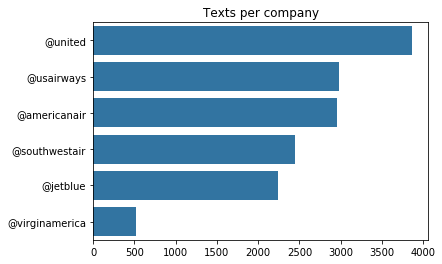

In [7]:
# Show texts per company
content_mining.plot_company_count(dataframe=data_df, company_list=airline_ls)

In [7]:
# Filter the data to include only texts mentioning JetBlue
jetblue = content_mining.filter_by_company(dataframe=data_df, company="@jetblue")
jetblue.head()

,id,datetime,location,company_tags,doc
80,569933816963342337,2015-02-23 18:56:25,NaN,"[@virginamerica, @southwestair, @jetblue]","(@VirginAmerica, why, ca, n't, you, supp, the,..."
1976,569497031322030081,2015-02-22 14:00:47,"Williamsburg, Brooklyn","[@united, @jetblue]","(@united, Good, luck, with, the, no, -, enerta..."
2761,568917261869674497,2015-02-20 23:36:59,"New York, NY","[@americanair, @united, @southwestair, @jetblue]","(@united, I, will, !, On, ., @AmericanAir, ., ..."
3740,568159085356384256,2015-02-18 21:24:16,"San Francisco Bay Area, USA","[@united, @jetblue]","(@united, and, btw, ,, the, ., @Virgin, and, ...."
3963,567907430069329920,2015-02-18 04:44:17,"Brooklyn, NY","[@united, @jetblue]","(@united, :, take, note, of, this, great, exam..."


## 2. Analyzing trends and anomalies

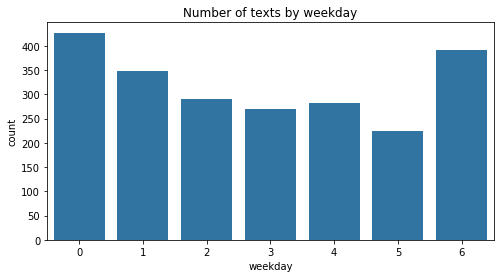

In [8]:
# Plot JetBlue tweet counts by weekday
content_mining.plot_trends(dataframe=jetblue, period="weekday")

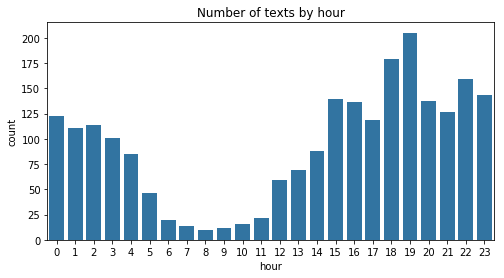

In [9]:
# Plot JetBlue  tweet counts by hour of day
content_mining.plot_trends(dataframe=jetblue, period="hour")

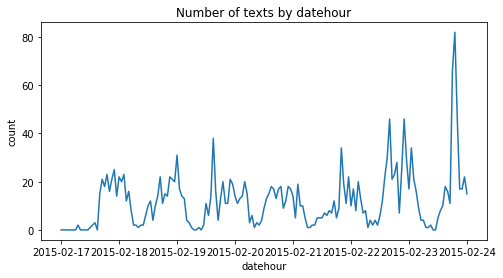

In [10]:
# Plot JetBlue tweet counts by dates and hours
content_mining.plot_trends(dataframe=jetblue, period="datehour")

### Addition: Frequency heatmaps

Frequency heatmaps were not included in the IBM Watson Content Mining demo, but can be a useful for visualizing certain aspects of datasets.

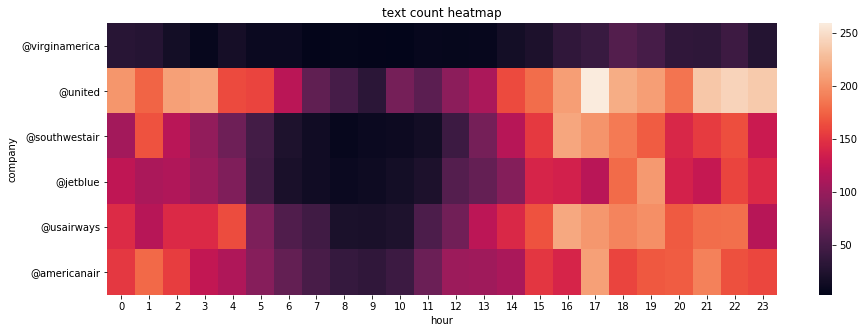

In [12]:
# Plot tweet counts by company and weekday
content_mining.heatmap_company(dataframe=data_df, company_list=airline_ls, 
                          period="hour", figsize=(15,5))

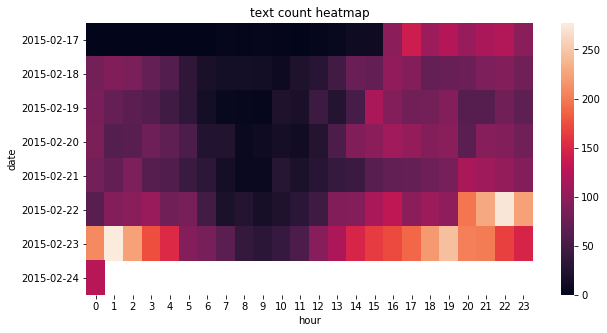

In [13]:
# Plot tweet counts by date and hour
content_mining.heatmap_datehour(data_df, figsize=(10,5))

## 3. Unusual words or phrases

In [12]:
# Return unusual words (as in words with a high tf-idf-value)
vocab = custom_tfidf.build_vocab(data_df["doc"], min_df=10)
tfidf = custom_tfidf.build_tfidf_complete(data_df["doc"], min_df=10)

content_mining.get_topk_terms(dataframe=jetblue, vocabulary=vocab, 
                         tfidf_matrix=tfidf, topk=10)

,vocab,tfidf
108,@jetblue,2234.0
648,flight,444.0
1483,thanks,182.0
2,,180.0
645,fleek,148.0
646,fleet,146.0
1499,time,103.0
853,jfk,97.0
1482,thank,93.0
1343,service,91.0


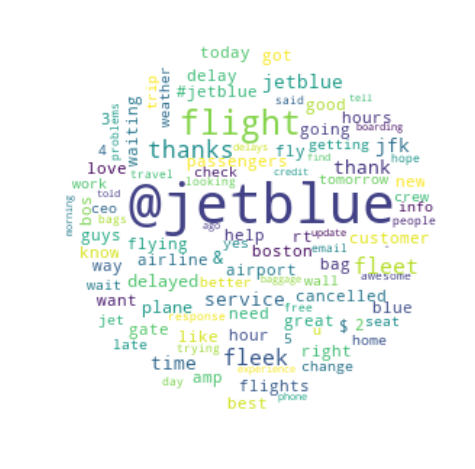

In [14]:
# Visualize prominent words as wordcloud
content_mining.draw_wordcloud(dataframe=jetblue, max_words=100, 
                         tfidf_matrix=tfidf, vocabulary=vocab)

## 4. Return texts including certain keywords

In [15]:
# Return all texts in the JetBlue data that contain the keywords in keyword_ls
keyword_ls = ["delays", "delayed", "cancel", "cancelled"]

content_mining.filter_by_keyword(dataframe=jetblue, keyword_list=keyword_ls)[0:20]

4948    @SouthwestAir most other carriers were flying ...
6758    @JetBlue but by Cancelled Flighting my flight ...
6763    @JetBlue Cancelled Flighted my flight. Went wi...
6790    @JetBlue flight 462 to Boston delayed due to w...
6835    @JetBlue I believe that the website said I cou...
6836    @JetBlue A month ago I had a flight booked but...
6841    @JetBlue why was Flight 1856 delayed to Buffal...
6879    @JetBlue we would have been up in the air by n...
6908    @JetBlue Are all of your flights out of Charle...
6911    @JetBlue not ok to Cancelled Flight flight 127...
6927    @JetBlue flight for tomorrow morning Cancelled...
6959    @JetBlue once again my flight is delayed. I ho...
6980    @JetBlue three hours on s delayed flight stari...
7079    @JetBlue any info on why flight 704 from SJU t...
7174    @JetBlue Sure did go south after breakfast tho...
7189    @JetBlue Unhappy with 4 hour delayed flight.. ...
7212    @JetBlue will you Cancelled Flight tonight's 7...
7229    @JetBl

## Next Steps

* Scripts: Use def/main
* Update the gen_nlp() function to take and return an arbitrary number of context columns
* Add filter by location
* Update the get_topk_terms() function to automatically calculate vocabulary and tf-idf-matrix
* Add separation by part-of-speech
* Identify and add other useful visualization features